# CIFAR10 Image Classification using 2D CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

In [6]:
classes_name=['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','skip','truck']

In [7]:
x_train.max()

255

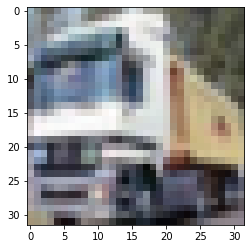

In [8]:
plt.imshow(x_train[1])

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
(x_train.shape, x_test.shape)

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Build CNN Model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [15]:
history=model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 12s 2ms/step - loss: 1.3699 - sparse_categorical_accuracy: 0.5111 - val_loss: 1.1531 - val_sparse_categorical_accuracy: 0.5940
Epoch 2/10
5000/5000 [==============================] - 12s 2ms/step - loss: 1.0737 - sparse_categorical_accuracy: 0.6190 - val_loss: 1.0088 - val_sparse_categorical_accuracy: 0.6432
Epoch 3/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.9604 - sparse_categorical_accuracy: 0.6584 - val_loss: 0.9656 - val_sparse_categorical_accuracy: 0.6609
Epoch 4/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.8802 - sparse_categorical_accuracy: 0.6887 - val_loss: 0.9130 - val_sparse_categorical_accuracy: 0.6797
Epoch 5/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.8181 - sparse_categorical_accuracy: 0.7112 - val_loss: 0.9233 - val_sparse_categorical_accuracy: 0.6738
Epoch 6/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.7551 -

In [20]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

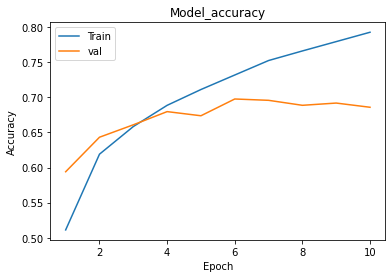

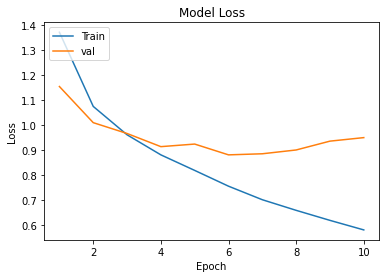

In [21]:
plot_learningCurve(history, 10)

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = model.predict_classes(x_test)
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [25]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [27]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[618,  30,  78,  34,  28,   9,  13,  11, 122,  57],
       [  7, 818,   9,  20,   6,   3,   5,   3,  45,  84],
       [ 47,   8, 583, 103,  89,  74,  45,  23,  18,  10],
       [ 10,  12,  71, 569,  65, 174,  44,  21,  19,  15],
       [  8,   5,  87, 104, 654,  43,  37,  45,  15,   2],
       [  6,   5,  62, 226,  48, 580,  17,  40,  13,   3],
       [  3,   7,  57, 135,  63,  35, 688,   1,   8,   3],
       [  6,   7,  45,  67,  80,  57,   4, 723,   4,   7],
       [ 31,  39,  19,  25,   8,  10,   3,   4, 845,  16],
       [  9,  98,   4,  28,   8,   9,   3,  15,  45, 781]])

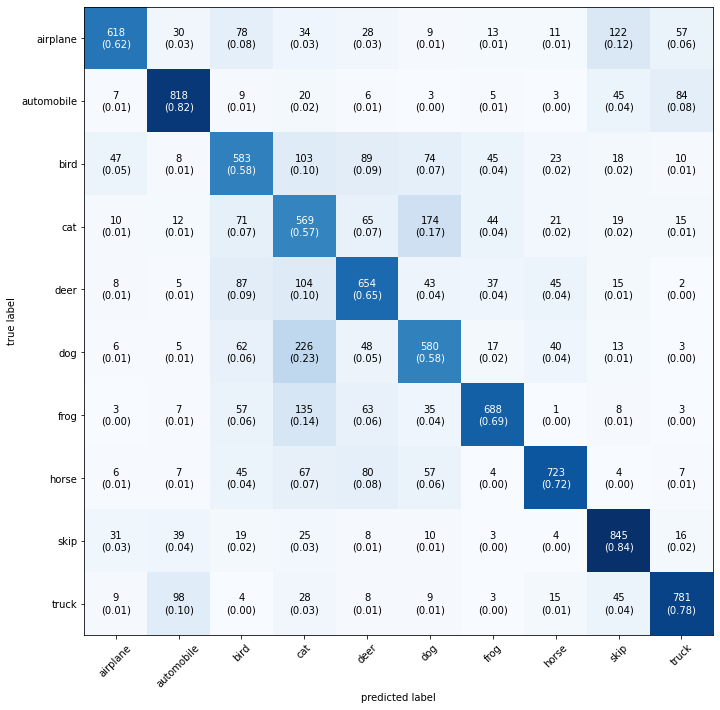

In [35]:
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(10,10),class_names=classes_name, show_normed=True)
plt.tight_layout()
fig.savefig('cm.png')